## Equipe : Gabriel Monteiro e Tobias

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [73]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=1000, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [74]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

example_data[0].shape

torch.Size([3, 32, 32])

## Primeira configuração

In [4]:
class CNN(torch.nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.fc1 = torch.nn.Linear(3072, 10)
        
    def forward(self, x):
        out = self.cnn(x)
        out = x.view(out.size(0), -1)
        out = self.fc1(out)
        return out

/home/gabrielmonteiro/Documentos/Projetos/RNA/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


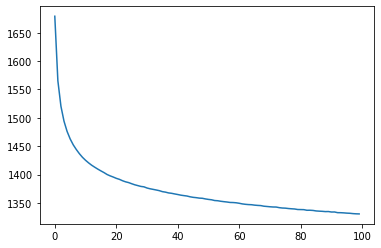

In [5]:
#train

model = CNN()
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        y_hat = model.forward(data)
        error = criterion(y_hat, target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

In [6]:
def test():
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('{}/{} ({:.0f}%)'.format(correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [7]:
test()

4016/10000 (40%)


## Segunda configuração

In [69]:
class CNN2(torch.nn.Module):
    
    def __init__(self):
        super(CNN2, self).__init__()
        self.cnn2 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=8, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(16, 32, kernel_size=8, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.fc1 = torch.nn.Linear(3072, 10)
        
    def forward(self, x):
        out = self.cnn2(x)
        out = x.view(out.size(0), -1)
        out = self.fc1(out)
        return out

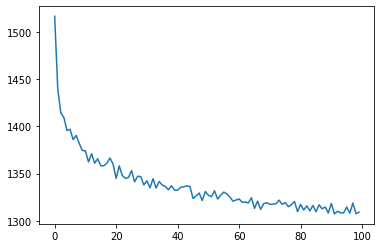

In [70]:
#train

model = CNN2()
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        y_hat = model.forward(data)
        error = criterion(y_hat, target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

In [71]:
def test2():
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('{}/{} ({:.0f}%)'.format(correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [72]:
test2()

3549/10000 (35%)
